In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load dataset
df = pd.read_csv('monkeypox.csv')

# Print the number of rows before dropping missing values
print("\nNumber of rows before dropping missing values:", len(df))

# Drop missing values (if any)
df = df.dropna()

# Print the number of rows after dropping missing values
print("\nNumber of rows after dropping missing values:", len(df))

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")

# Drop duplicate rows (if any)
df = df.drop_duplicates()

# Print the number of rows after dropping duplicates
print("\nNumber of rows after dropping duplicate rows:", len(df))

# Encode categorical variables like 'Systemic Illness' and 'MonkeyPox' (target)
# Label encode 'MonkeyPox' as it is the target (Positive -> 1, Negative -> 0)
label_encoder = LabelEncoder()
df['MonkeyPox'] = label_encoder.fit_transform(df['MonkeyPox'])

# One-hot encode 'Systemic Illness' because it has multiple categories
df = pd.get_dummies(df, columns=['Systemic Illness'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Patient_ID', 'MonkeyPox'], axis=1)  # Drop irrelevant columns
y = df['MonkeyPox']

# Print the number of rows in the preprocessed features and target variable
print("\nNumber of rows in preprocessed features (X):", len(X))
print("Number of rows in target variable (y):", len(y))


Number of rows before dropping missing values: 25000

Number of rows after dropping missing values: 18784

Number of duplicate rows: 0

Number of rows after dropping duplicate rows: 18784

Number of rows in preprocessed features (X): 18784
Number of rows in target variable (y): 18784


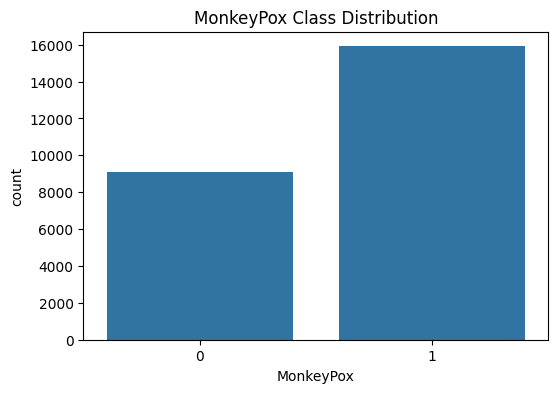

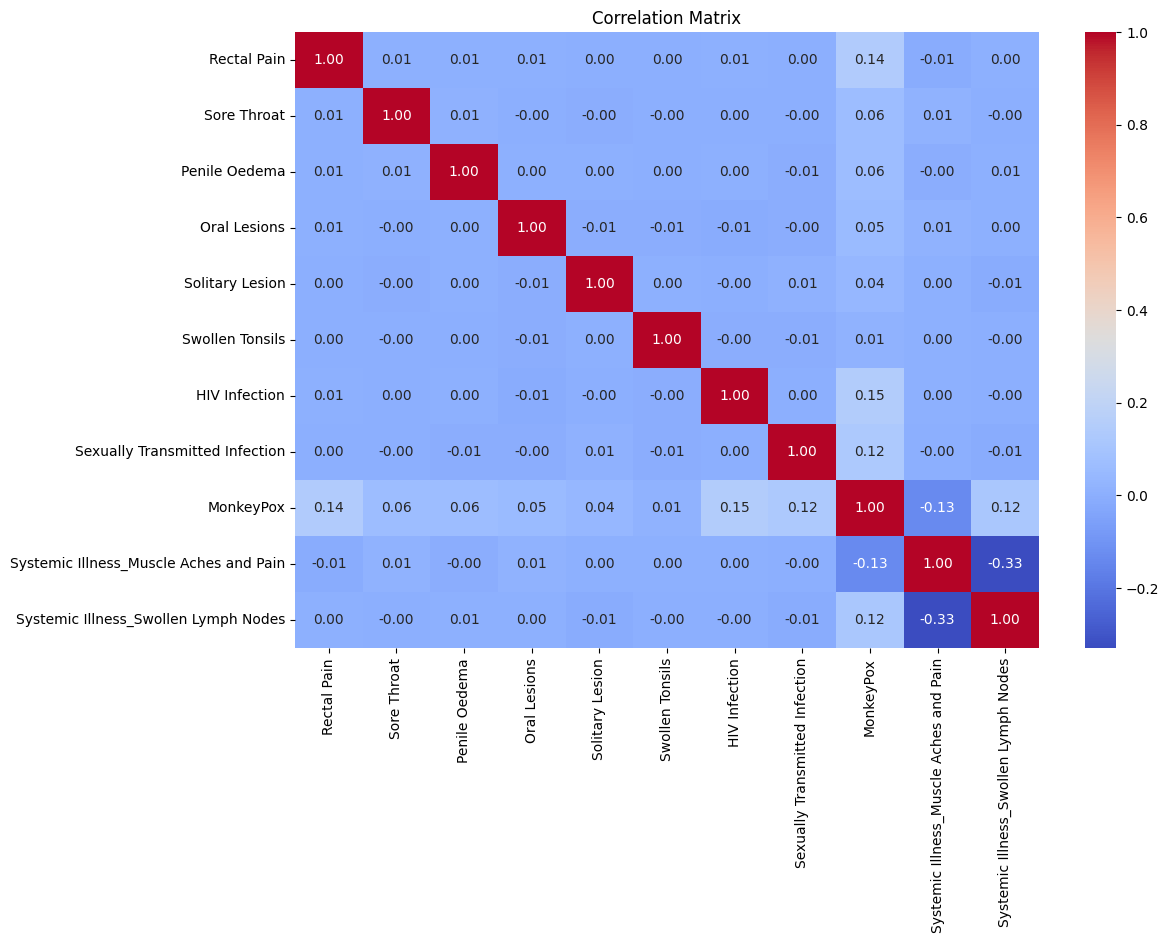

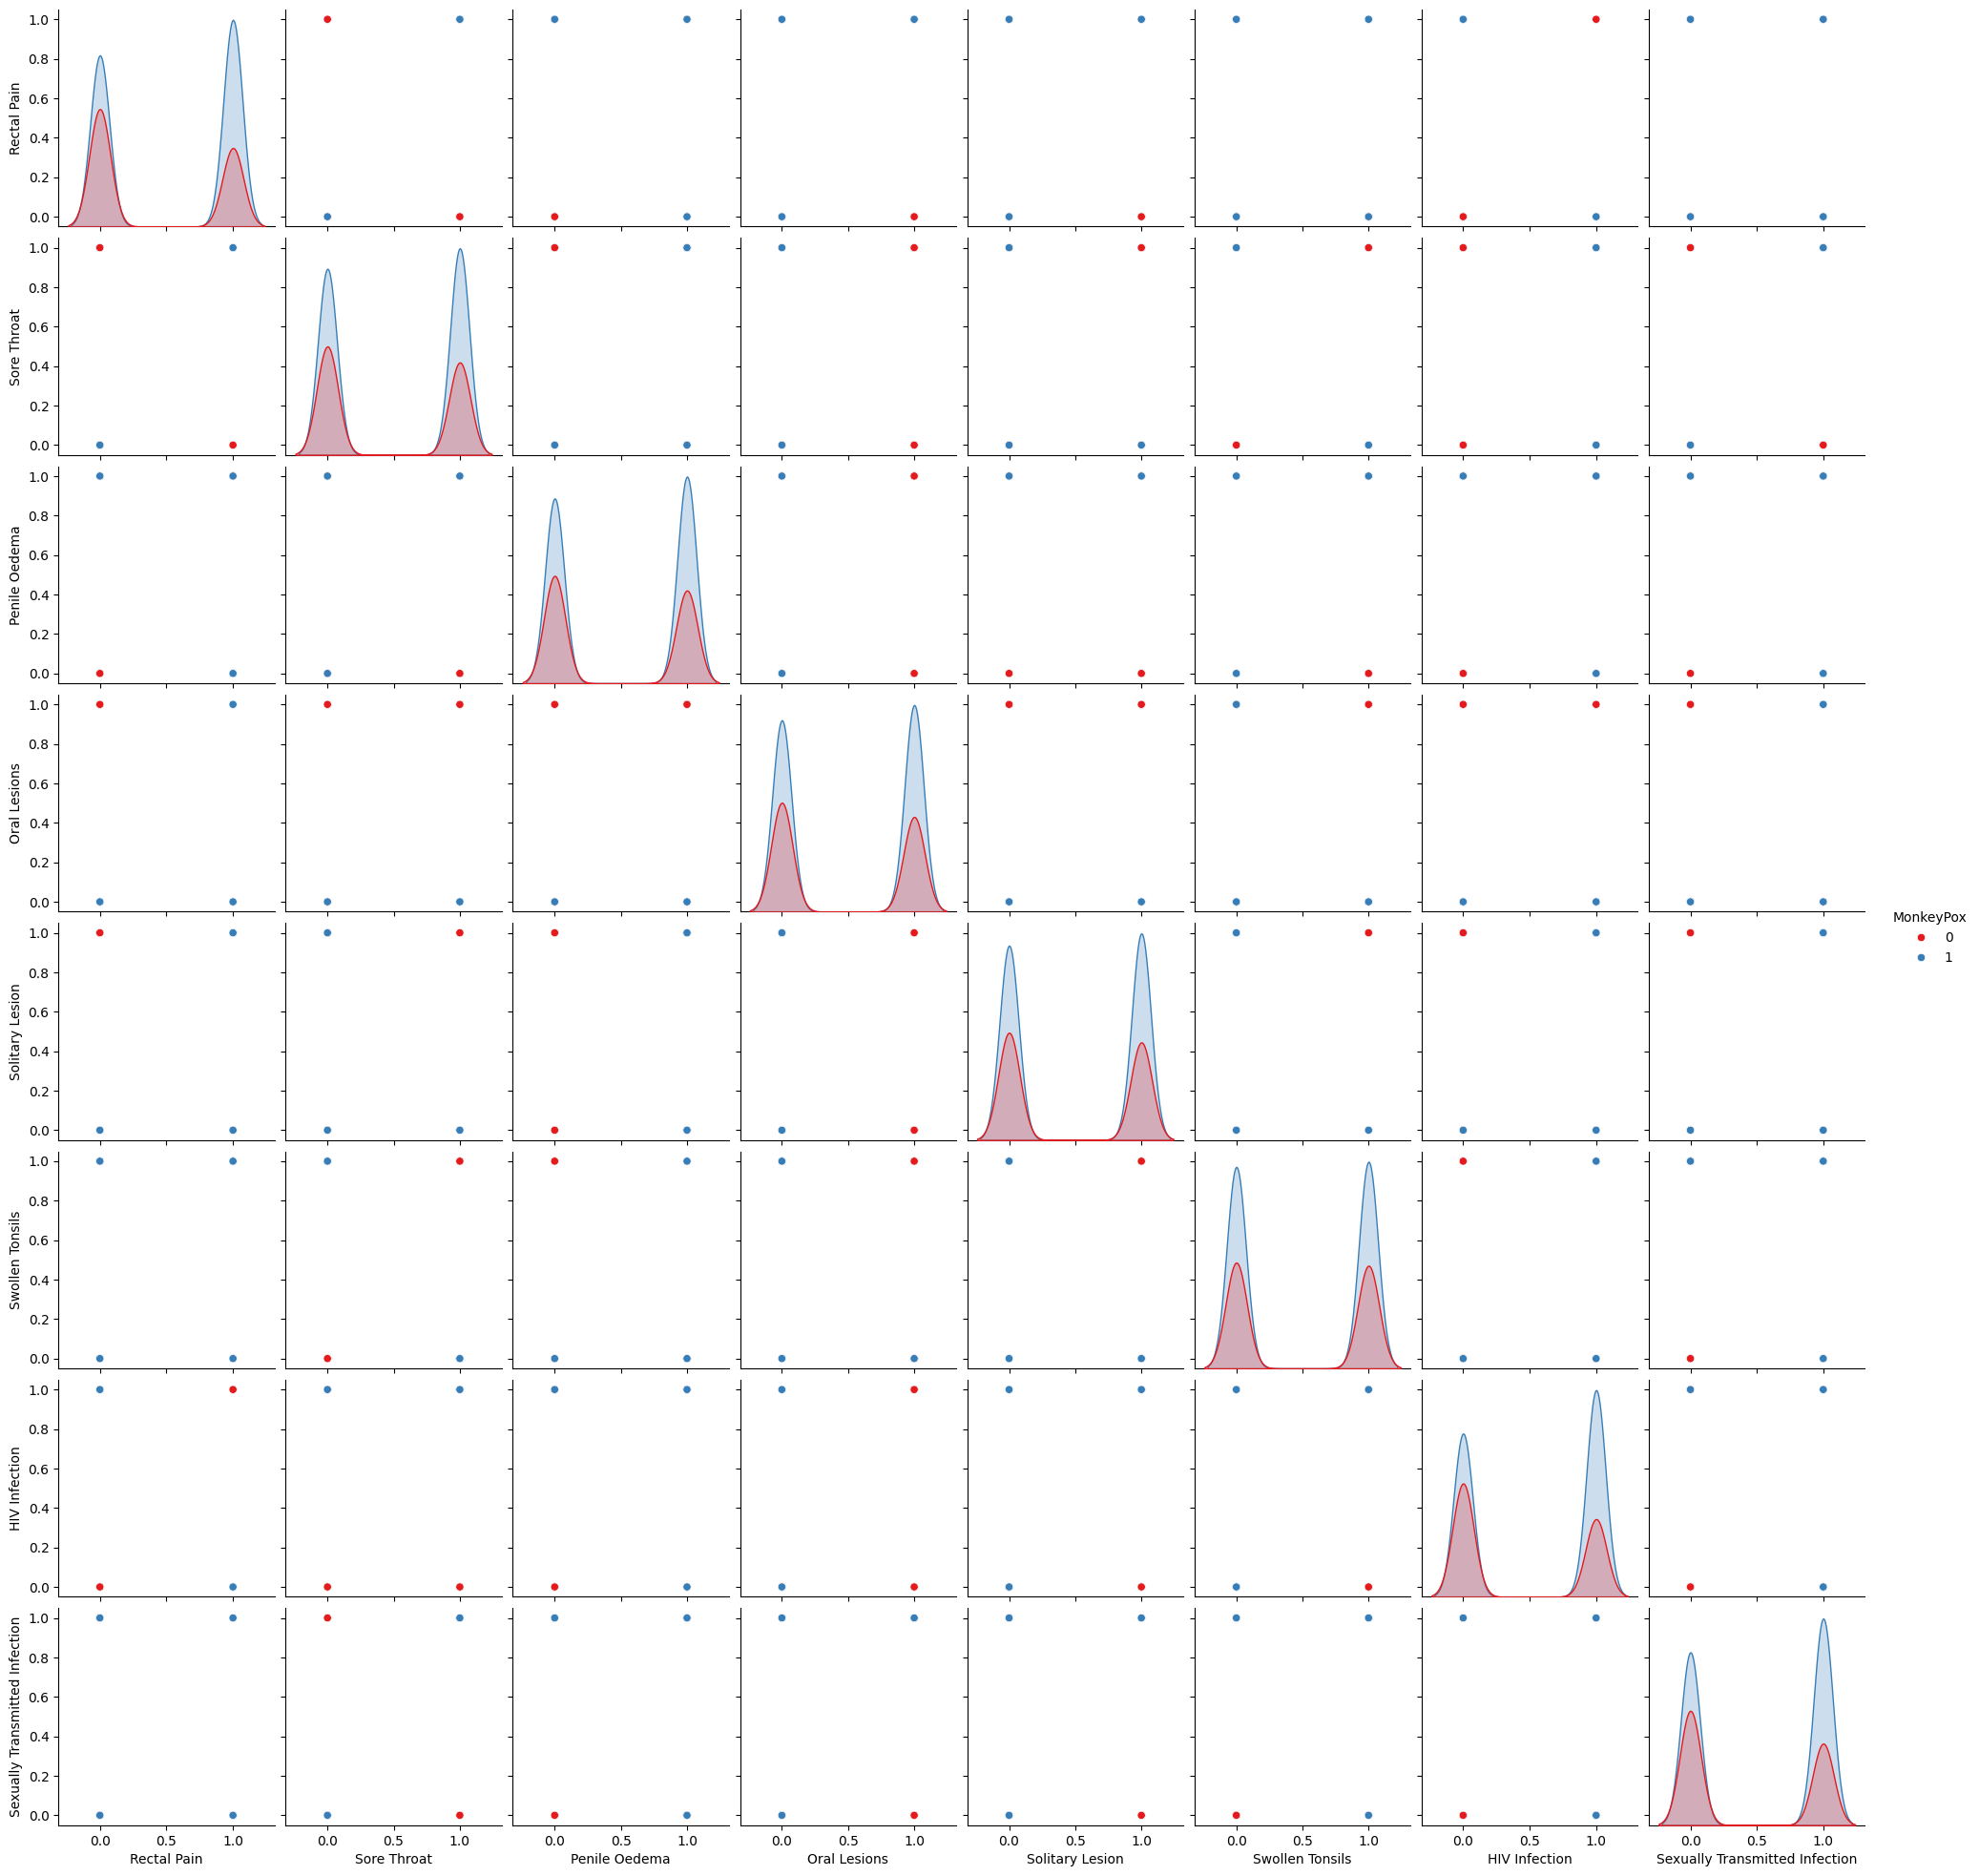

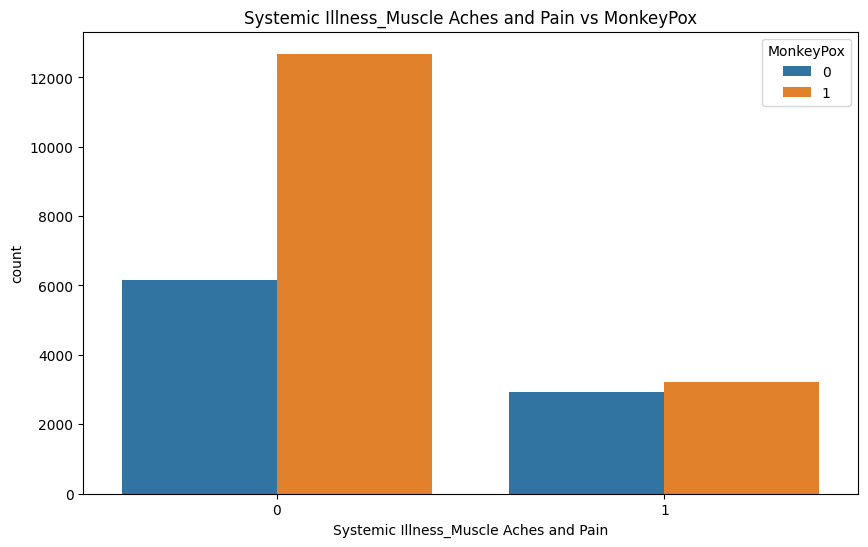

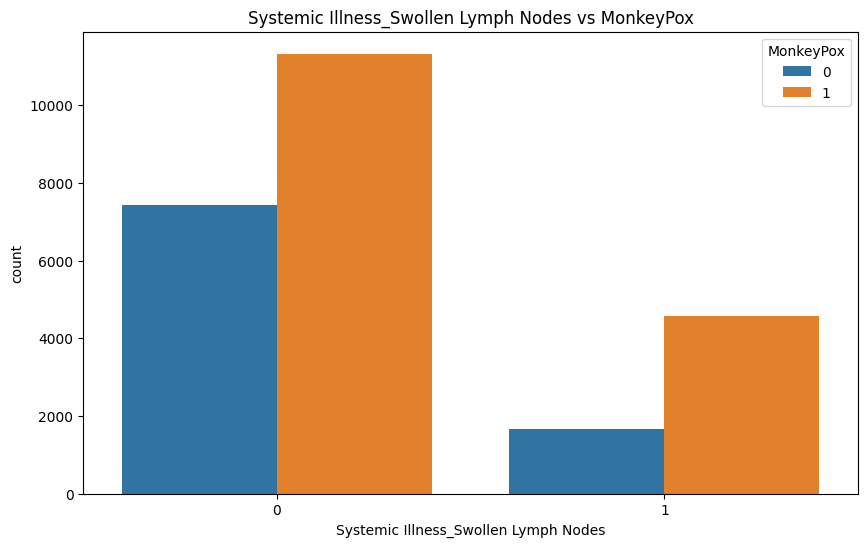

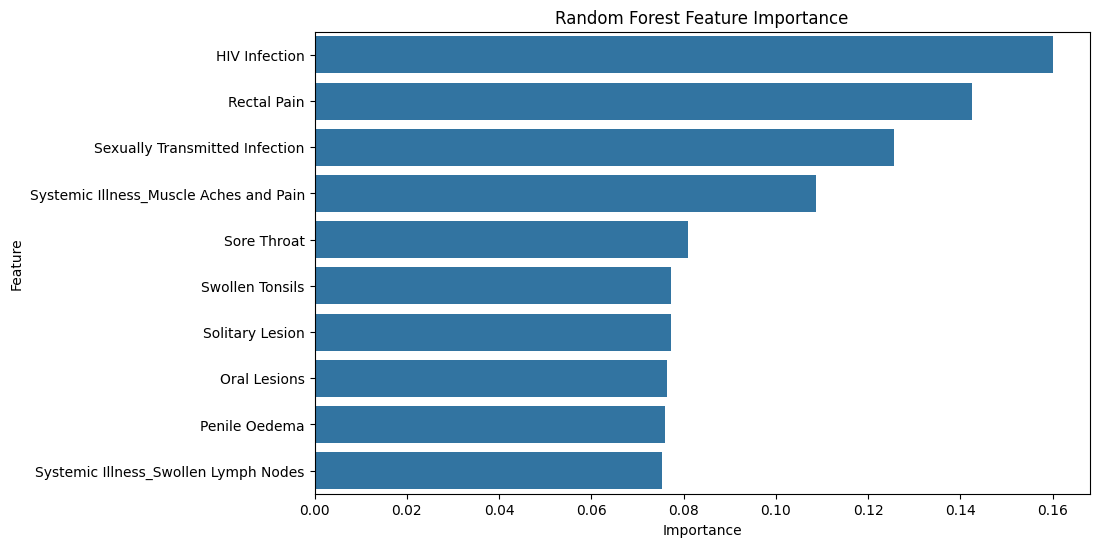

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv('monkeypox.csv')
df = df.drop(['Patient_ID'], axis=1)

# Convert 'MonkeyPox' to boolean (Positive -> 1, Negative -> 0)
df['MonkeyPox'] = df['MonkeyPox'].map({'Positive': 1, 'Negative': 0})

# Check the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='MonkeyPox')
plt.title('MonkeyPox Class Distribution')
plt.show()

# One-hot encode 'Systemic Illness' because it has multiple categories
df = pd.get_dummies(df, columns=['Systemic Illness'], drop_first=True)

# Convert boolean columns to integers (True -> 1, False -> 0)
boolean_cols = df.select_dtypes(include=['bool']).columns
df[boolean_cols] = df[boolean_cols].astype(int)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plot distribution of key features (boolean and systemic illness)
# Select boolean columns to analyze their relationships with MonkeyPox
bool_cols_with_target = ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 
                         'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
                         'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox']

# Pair plot for visualizing the relationships
sns.pairplot(df[bool_cols_with_target], hue='MonkeyPox', palette='Set1')
plt.show()

# Analyze how 'Systemic Illness' relates to 'MonkeyPox' using bar plots
# Plot the one-hot encoded columns for Systemic Illness
illness_cols = [col for col in df.columns if 'Systemic Illness' in col]
for col in illness_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='MonkeyPox')
    plt.title(f'{col} vs MonkeyPox')
    plt.show()

# Define the target variable 'y' and the feature set 'X'
X = df.drop('MonkeyPox', axis=1)
y = df['MonkeyPox']

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Random Forest Feature Importance')
plt.show()

Epoch 1/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5291 - loss: 0.8577 - val_accuracy: 0.6000 - val_loss: 0.6899
Epoch 2/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5875 - loss: 0.7026 - val_accuracy: 0.6290 - val_loss: 0.6570
Epoch 3/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6014 - loss: 0.6776 - val_accuracy: 0.6413 - val_loss: 0.6411
Epoch 4/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6203 - loss: 0.6645 - val_accuracy: 0.6540 - val_loss: 0.6345
Epoch 5/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6350 - loss: 0.6493 - val_accuracy: 0.6572 - val_loss: 0.6313
Epoch 6/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6314 - loss: 0.6533 - val_accuracy: 0.6607 - val_loss: 0.6281
Epoch 7/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6403 - loss: 0.6430 - val_accuracy: 0.6612 - val_loss: 0.6258
Epoch 8/60
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6472 - loss: 0.6392 - 

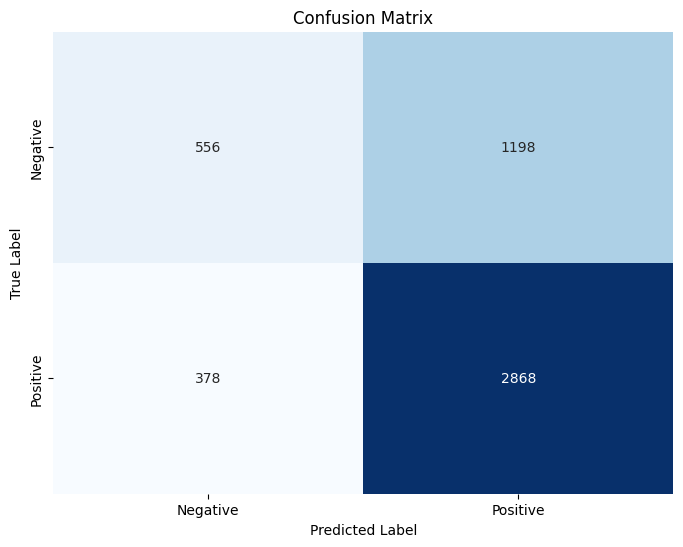

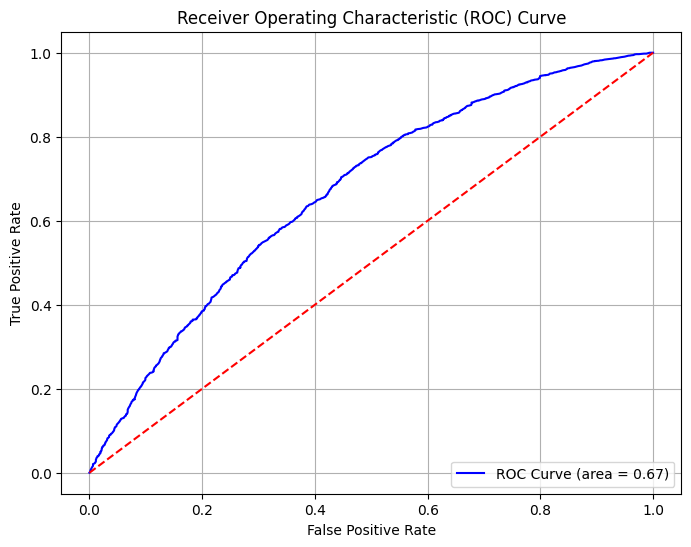

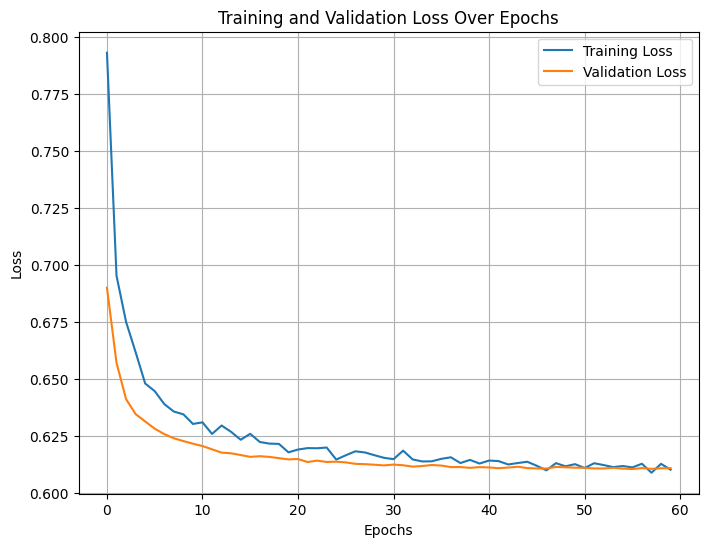

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset
df = pd.read_csv('monkeypox.csv')
df = df.drop(['Patient_ID'], axis=1)

# Convert 'MonkeyPox' to boolean (Positive -> 1, Negative -> 0)
df['MonkeyPox'] = df['MonkeyPox'].map({'Positive': 1, 'Negative': 0})

# One-hot encode 'Systemic Illness' because it has multiple categories
df = pd.get_dummies(df, columns=['Systemic Illness'], drop_first=True)

# Convert boolean columns to integers (True -> 1, False -> 0)
boolean_cols = df.select_dtypes(include=['bool']).columns
df[boolean_cols] = df[boolean_cols].astype(int)

# Define the target variable 'y' and the feature set 'X'
X = df.drop('MonkeyPox', axis=1)
y = df['MonkeyPox']

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a neural network model
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = keras.optimizers.SGD(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(X_train, y_train, epochs=60, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_probs = model.predict(X_test).flatten()  # Get predicted probabilities
y_pred = np.where(y_pred_probs > 0.5, 1, 0)  # Convert probabilities to class predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Optimized Neural Network Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plot the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.9s
Optimized Random Forest Model Performance:
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.25      0.36      1754
           1       0.70      

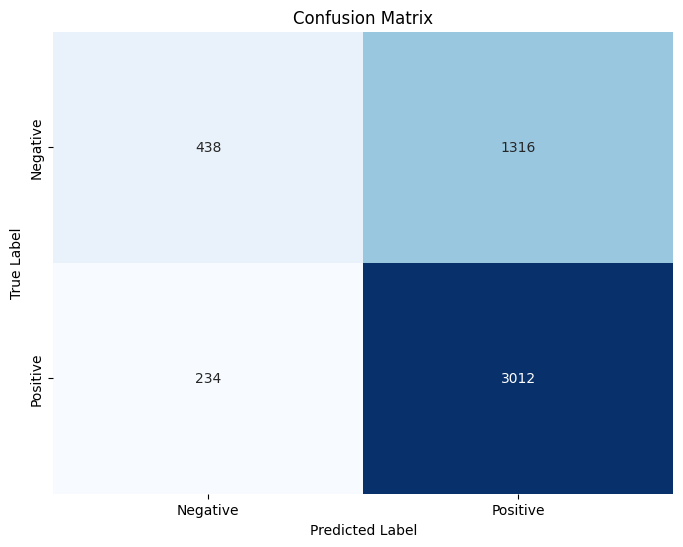

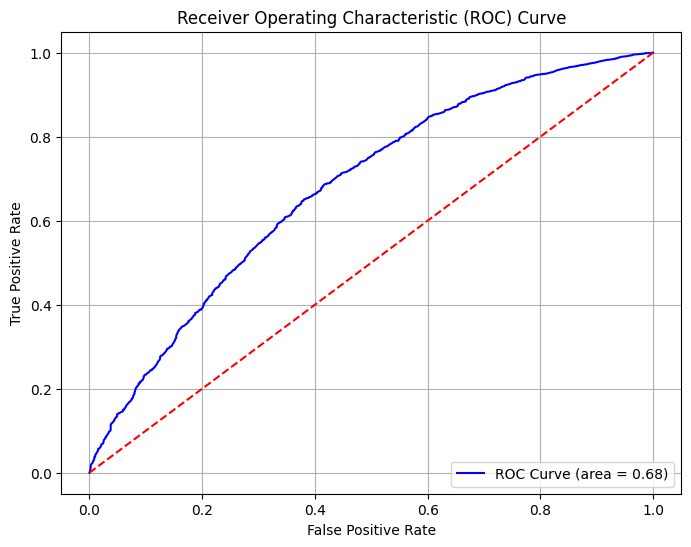

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv('monkeypox.csv')
df = df.drop(['Patient_ID'], axis=1)

# Convert 'MonkeyPox' to boolean (Positive -> 1, Negative -> 0)
df['MonkeyPox'] = df['MonkeyPox'].map({'Positive': 1, 'Negative': 0})

# One-hot encode 'Systemic Illness' because it has multiple categories
df = pd.get_dummies(df, columns=['Systemic Illness'], drop_first=True)

# Convert boolean columns to integers (True -> 1, False -> 0)
boolean_cols = df.select_dtypes(include=['bool']).columns
df[boolean_cols] = df[boolean_cols].astype(int)

# Define the target variable 'y' and the feature set 'X'
X = df.drop('MonkeyPox', axis=1)
y = df['MonkeyPox']

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Set a reduced parameter grid
param_grid = {
    'n_estimators': [500],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# Setup the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=1,  # Limit parallelism and CV folds
                           verbose=2, error_score='raise')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
rf_predictions = best_rf_model.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion = confusion_matrix(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

# Print results
print("Optimized Random Forest Model Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {rf_accuracy:.2f}")
print("Classification Report:\n", rf_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
# Get the predicted probabilities
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = roc_auc_score(y_test, rf_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()